In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import tensorflow as tf
#import c

In [3]:
f = misc.face()
#misc.imsave('cat.PNG', f) # uses the Image module (PIL)

In [5]:
type(f)

numpy.ndarray

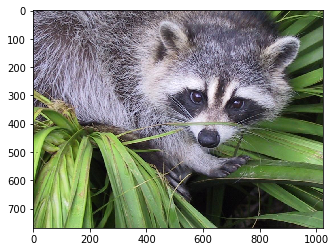

In [15]:
plt.imshow(f)
plt.show()

In [16]:
type(f)

numpy.ndarray

In [17]:
f.shape,f.dtype

((768, 1024, 3), dtype('uint8'))

In [18]:
f = misc.face(gray=True)
f.shape, f.dtype

((768, 1024), dtype('uint8'))

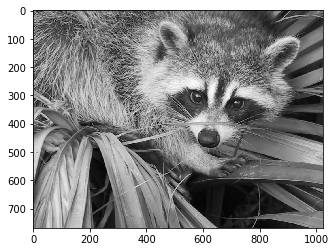

In [19]:
plt.imshow(f, cmap=plt.cm.gray)

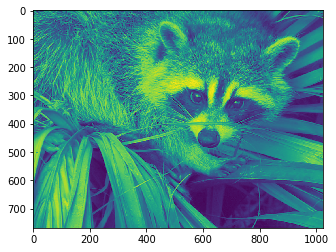

In [20]:
plt.imshow(f)
plt.show()

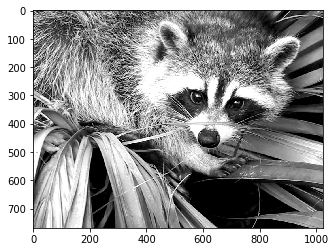

In [21]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)

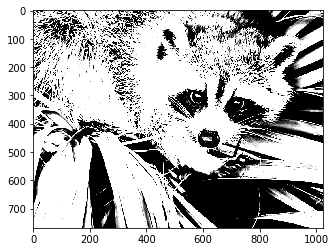

In [22]:
plt.imshow(f, cmap=plt.cm.gray, vmin=80, vmax=100)

(0.0, 1.0, 0.0, 1.0)

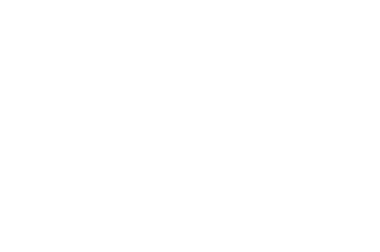

In [23]:
 plt.axis('off')

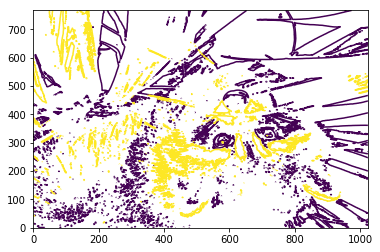

In [24]:
plt.contour(f, [50, 200])

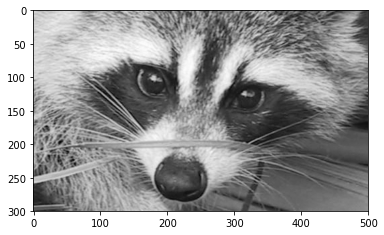

In [25]:
plt.imshow(f[200:500, 400:900], cmap=plt.cm.gray, interpolation='bilinear')

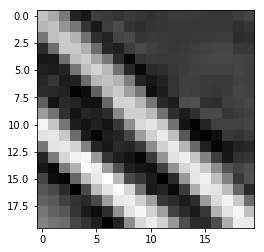

In [26]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')

In [27]:
f.shape, f[0, 40]

((768, 1024), 127)

In [28]:
f[10:13, 20:23]

array([[141, 153, 145],
       [133, 134, 125],
       [ 96,  92,  94]], dtype=uint8)

In [29]:
f[100:120] = 255

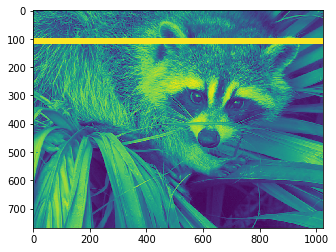

In [30]:
plt.imshow(f)
plt.show()

In [31]:
lx, ly = f.shape

In [32]:
X, Y = np.ogrid[0:lx, 0:ly]

In [33]:
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4

In [34]:
f[mask] = 210

In [35]:
f[range(400), range(400)] = 255

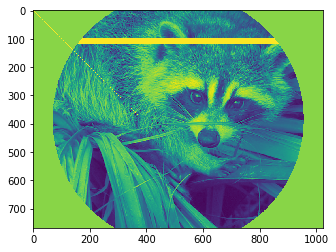

In [36]:
plt.imshow(f)
plt.show()

In [37]:
f.mean()

141.91193771362305

In [38]:
f.max(), f.min()

(255, 0)

In [39]:
crop_face = f[lx // 4: - lx // 10, ly // 4: - ly // 5]

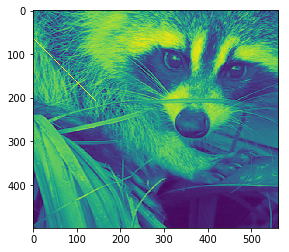

In [40]:
plt.imshow(crop_face)
plt.show()

In [41]:
flip_ud_face = np.flipud(f)

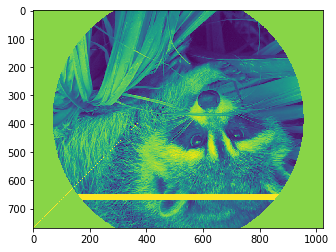

In [42]:
plt.imshow(flip_ud_face)
plt.show()

In [43]:
rotate_face = ndimage.rotate(f, 45)

In [44]:
rotate_face_noreshape = ndimage.rotate(f, 45, reshape=False)

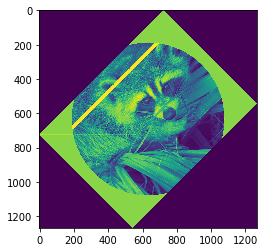

In [45]:
plt.imshow(rotate_face)
plt.show()

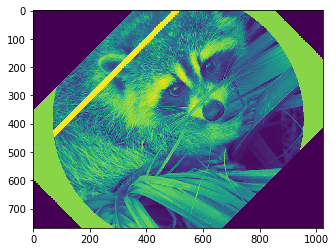

In [46]:
plt.imshow(rotate_face_noreshape)
plt.show()

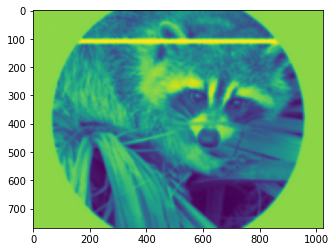

In [47]:
blurred_face = ndimage.gaussian_filter(f, sigma=4)
plt.imshow(blurred_face)
plt.show()

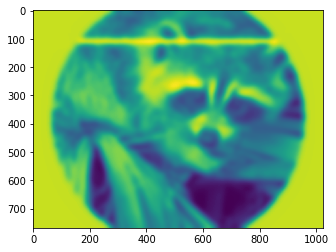

In [48]:
blurred_face = ndimage.gaussian_filter(f, sigma=10)
plt.imshow(blurred_face)
plt.show()

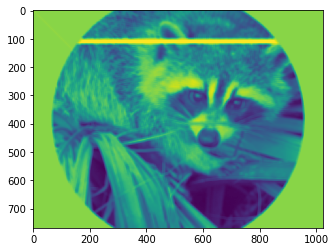

In [49]:
local_mean = ndimage.uniform_filter(f, size=11)
plt.imshow(local_mean)
plt.show()

In [50]:
from scipy import misc

In [51]:
face = misc.face(gray=True).astype(float)

In [72]:
blurred_f = ndimage.gaussian_filter(face, 3)

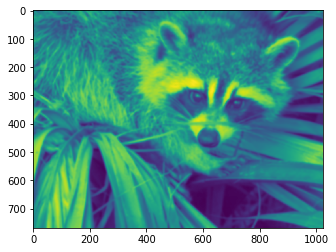

In [73]:
plt.imshow(blurred_f)
plt.show()

In [74]:
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 10)

In [75]:
alpha = 30

In [76]:
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

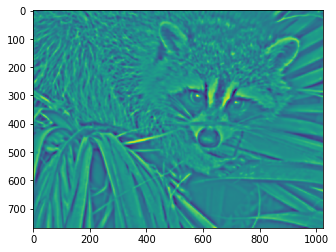

In [77]:
plt.imshow(sharpened)
plt.show()

# Denoising

In [78]:
f = misc.face(gray=True)

In [79]:
f = f[230:290, 220:320]

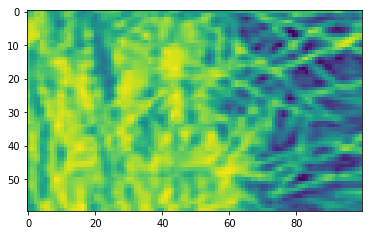

In [80]:
plt.imshow(f)
plt.show()

In [81]:
noisy = f + 0.4 * f.std() * np.random.random(f.shape)

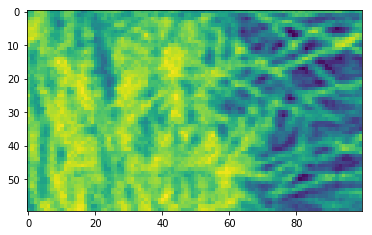

In [82]:
plt.imshow(noisy)
plt.show()

In [83]:
gauss_denoised = ndimage.gaussian_filter(noisy, 2)

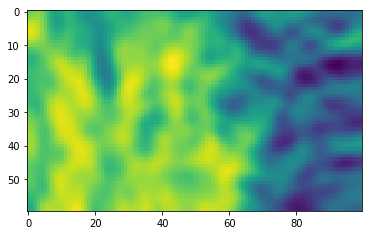

In [84]:
plt.imshow(gauss_denoised)
plt.show()

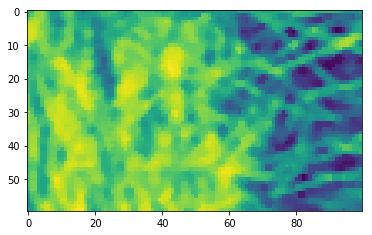

In [85]:
med_denoised = ndimage.median_filter(noisy, 3)
plt.imshow(med_denoised)
plt.show()

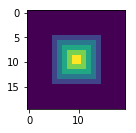

In [99]:
im = np.zeros((20, 20))
im[5:-5, 5:-5] = 1
im = ndimage.distance_transform_bf(im)
im_noise = im + 0.2 * np.random.randn(*im.shape)
im_med = ndimage.median_filter(im_noise, 3)
plt.subplot(1,3,3)
plt.imshow(im)
plt.show()

In [116]:
el = ndimage.generate_binary_structure(2, 1)
el.shape

(3, 3)

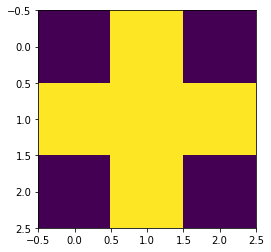

In [115]:
plt.imshow(el)
plt.show()

In [117]:
el

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]])

In [118]:
el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [119]:
a = np.zeros((7,7), dtype=np.int)

In [121]:
a[1:6, 2:5] = 1

In [122]:
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [123]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [125]:
# Erosion removes objects smaller than the structure
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [126]:
a = np.zeros((5, 5))

In [127]:
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [128]:
a[2, 2] = 1

In [129]:
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [130]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [170]:
np.random.seed(2)
im = np.zeros((64, 64))
x, y = (63*np.random.random((2, 8))).astype(np.int)
im[x, y] = np.arange(8)

bigger_points = ndimage.grey_dilation(im, size=(5, 5), structure=np.ones((5, 5)))

square = np.zeros((16, 16))
square[4:-4, 4:-4] = 1
dist = ndimage.distance_transform_bf(square)
dilate_dist = ndimage.grey_dilation(dist, size=(3, 3), structure=np.ones((3, 3)))

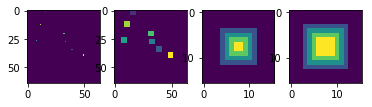

In [191]:
plt.subplot(1,4,1)
plt.imshow(im)
plt.subplot(1,4,2)
plt.imshow(bigger_points)
plt.subplot(1,4,3)
plt.imshow(dist)
plt.subplot(1,4,4)
plt.imshow(dilate_dist)
plt.show()

In [214]:
sx, sy = f.shape
X, Y = np.ogrid[0:sx, 0:sy]
r = np.hypot(X - sx/2, Y - sy/2)
rbin = (20* r/r.max()).astype(np.int)
radial_mean = ndimage.mean(f, labels=rbin, index=np.arange(1, rbin.max() +1))

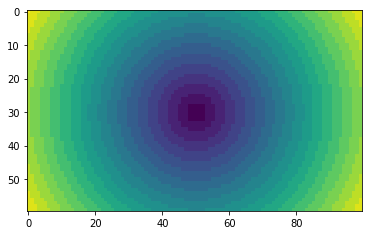

In [215]:
plt.imshow(rbin)
plt.show()
#f.shape

TypeError: Invalid dimensions for image data

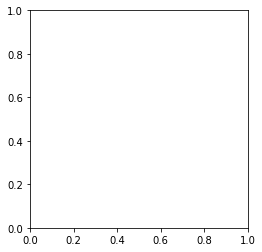

In [216]:
plt.imshow(radial_mean)
plt.show()

In [2]:
from sklearn.datasets import load_sample_images
dataset = load_sample_images()     
len(dataset.images)                

2

In [3]:
first_img_data = dataset.images[1] 
first_img_data.shape               

(427, 640, 3)

In [4]:
first_img_data.dtype               

dtype('uint8')

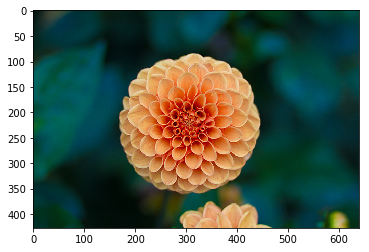

In [5]:
plt.imshow(first_img_data)
plt.show()

# Extract the feature and check the convoluted image

In [12]:
Convoluted_img_data = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (427, 640, 3))

In [16]:
type(Convoluted_img_data)
#plt.imshow(Convoluted_img_data)
#plt.show()

tensorflow.python.keras.layers.convolutional.Conv2D

AttributeError: 'Conv2D' object has no attribute 'shape'